In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
file_path = '/content/sample_data/age_gender.csv'

age_gender = pd.read_csv(file_path)

# Display the first few rows of the dataset
age_gender.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
age_gender.shape

(23705, 5)

In [ ]:
age_gender.dtypes

age           int64
ethnicity     int64
gender        int64
img_name     object
pixels       object
dtype: object

In [ ]:
age_gender.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [ ]:
age_gender.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [ ]:
# Get minimum and maximum values
min_value = age_gender['age'].min()
max_value = age_gender['age'].max()

# Calculate range
range_of_values = max_value - min_value

print(f"Range of 'values' column: {range_of_values}")

Range of 'values' column: 115


In [ ]:
min_value

1

In [ ]:
max_value

116

In [ ]:
age_gender['ethnicity'].value_counts()

ethnicity
0    10078
1     4526
3     3975
2     3434
4     1692
Name: count, dtype: int64

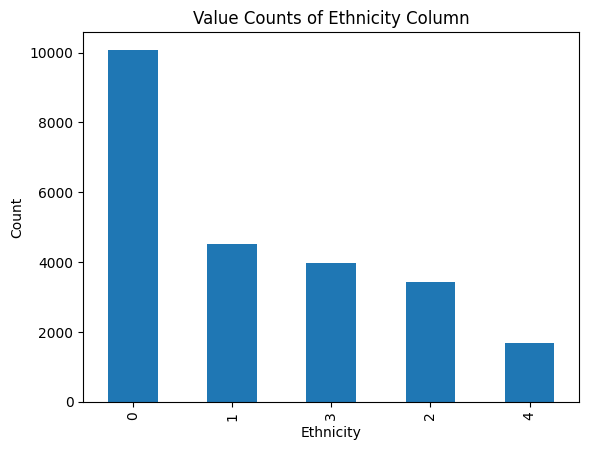

In [ ]:
# Get the value counts
valcount_ethnicity = age_gender['ethnicity'].value_counts()

# Create the bar plot
valcount_ethnicity.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Value Counts of Ethnicity Column')
plt.show()

In [ ]:
age_gender['gender'].value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

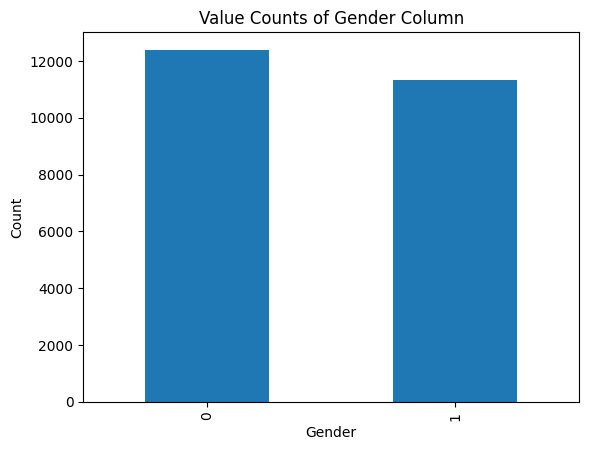

In [ ]:
# Get the value counts
valcount_gender = age_gender['gender'].value_counts()

# Create the bar plot
valcount_gender.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Value Counts of Gender Column')
plt.show()

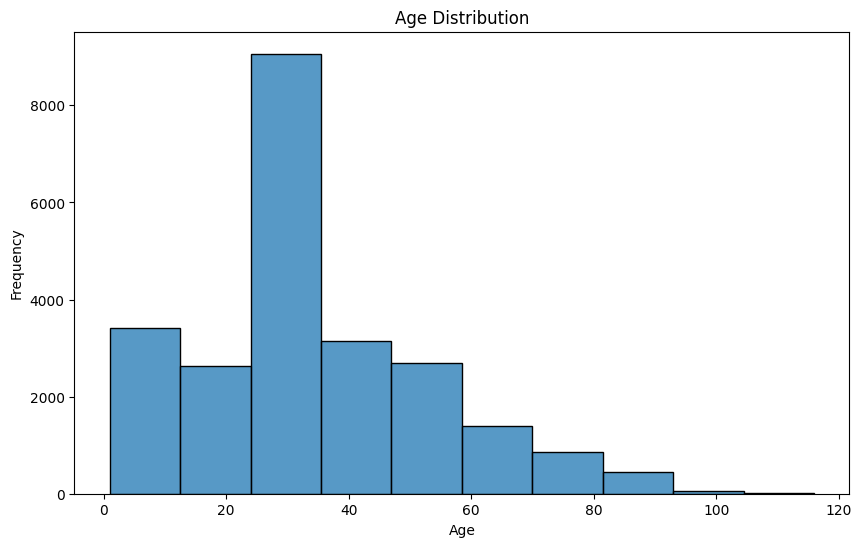

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(age_gender['age'], bins=10, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Drop the column (modifies the original DataFrame)
age_gender.drop('img_name', axis=1, inplace=True)

In [ ]:
age_gender.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
age_gender['pixels'] = age_gender['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
age_gender.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [ ]:
X = np.array(age_gender['pixels'].tolist())
X.shape

(23705, 2304)

In [ ]:
X = X.reshape(-1,48,48,1)

In [ ]:
y = age_gender['gender']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(18964, 48, 48, 1)

In [ ]:
X_test.shape

(4741, 48, 48, 1)

In [ ]:
y_train.shape

(18964, 2, 2)

In [ ]:
y_test.shape

(4741, 2)

In [ ]:
# Normalize the pixel values
X_train = X_train / 255.0
X_val = X_test / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_test, 2)

In [ ]:
y_train.shape

(18964, 2)

In [ ]:
y_test.shape

(4741, 2)

In [ ]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(2, activation='softmax')  # 2 units and softmax activation for binary classification
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # Change to categorical_crossentropy
#               metrics=['accuracy'])


In [ ]:
# history = model.fit(
#     X_train, y_train,
#     epochs=25,
#     batch_size=32,
#     validation_data=(X_val, y_val)
# )

Epoch 1/25
593/593 [==============================] - 70s 116ms/step - loss: 0.6923 - accuracy: 0.5223 - val_loss: 0.6928 - val_accuracy: 0.5206
Epoch 2/25
593/593 [==============================] - 70s 118ms/step - loss: 0.6923 - accuracy: 0.5225 - val_loss: 0.6937 - val_accuracy: 0.5206
Epoch 3/25
593/593 [==============================] - 70s 118ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6932 - val_accuracy: 0.5206
Epoch 4/25
593/593 [==============================] - 69s 116ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6928 - val_accuracy: 0.5206
Epoch 5/25
593/593 [==============================] - 75s 126ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6930 - val_accuracy: 0.5206
Epoch 6/25
593/593 [==============================] - 69s 116ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6932 - val_accuracy: 0.5206
Epoch 7/25
593/593 [==============================] - 70s 118ms/step - loss: 0.6922 - accuracy: 0.5233 - val_loss: 0.6927 - val_ac

In [ ]:
# Data Augmentation: Increases the diversity of the training data by applying random transformations
# such as rotations, shifts, flips, and zooms to the images during training, helping the model generalize better.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [ ]:
# Batch Normalization: Normalizes the inputs of each layer to have a mean of zero and a standard deviation of one.
# This helps to stabilize and speed up the training process, and can also act as a regularizer to reduce overfitting.
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 units and softmax activation for binary classification
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epoch = 25,
    validation_data=(X_val, y_val)
)

593/593 [==============================] - ETA: 0s - loss: 0.4260 - accuracy: 0.8082

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

149/149 [==============================] - 6s 42ms/step - loss: 0.6928 - accuracy: 0.5206
Validation Accuracy: 52.06%


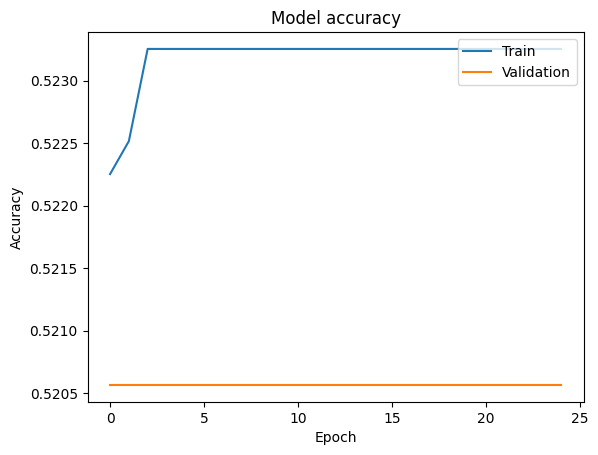

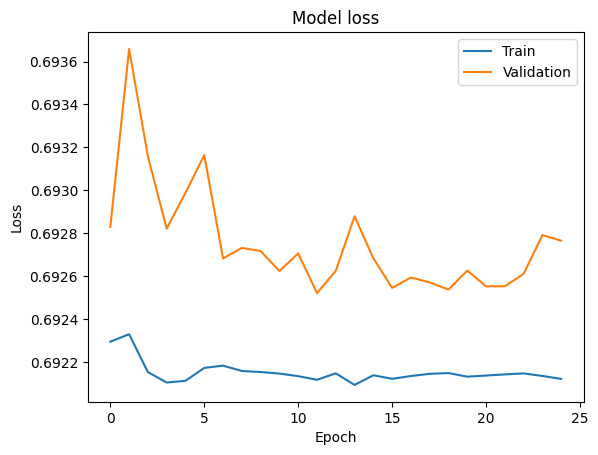

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary gender classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
target_columns = ['age', 'ethnicity', 'gender']

y = age_gender[target_columns]
X = age_gender.drop(target_columns, axis=1)

In [ ]:
X_train.shape

(18964, 1)

In [ ]:
y_train.shape

(18964, 3)